# Основы визуализации данных с помощью Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных.

### Описание домашнего задания и формат сдачи

Вам предстоит выполнить задачи по визуализации данных. Для этого  впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

**Важно учесть:** У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` – порядковый номер записи в датасете
* `Name` – наименование игры
* `Platform` – платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` – год выпуска игры
* `Genre` – жанр игры
* `Publisher` – наименование компании-издателя игры
* `NA_Sales` – объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` – объем продаж игры в Европе, млн. копий
* `JP_Sales` – объем продаж игры в Японии, млн. копий
* `Other_Sales` – объем продаж игры в остальных странах, млн. копий
* `Global_Sales` – объем продаж игры по всему миру, млн. копий

### Критерии оценки

**Зачет** – выполнены задачи 1-9, каждый график отформатирован и читаем

**На доработку** – выполнены не все обязательные задачи или какой-либо из графиков не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, необходимые для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [7]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
print(df)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии.

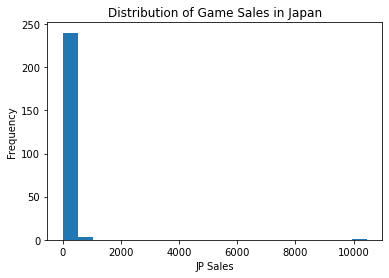

In [6]:
jp_sales = df['JP_Sales'].value_counts()
plt.hist(jp_sales, bins=20)
plt.xlabel('JP Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Game Sales in Japan')
plt.show()

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах.

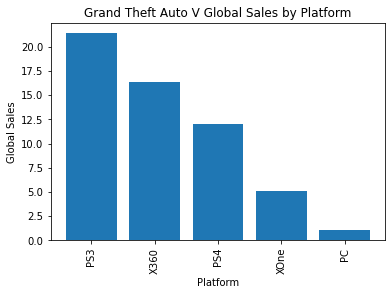

In [8]:
platf = df[df['Name'] == 'Grand Theft Auto V']['Platform'].unique()
sales = df[df['Name'] == 'Grand Theft Auto V']['Global_Sales'].values

plt.bar(platf, sales)
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.title('Grand Theft Auto V Global Sales by Platform') 
plt.xticks(rotation=90)
plt.show()


### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам.

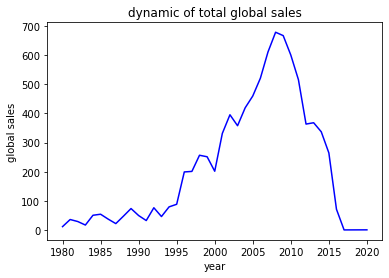

In [10]:
by_year = df.groupby('Year')['Global_Sales'].sum()

plt.plot(by_year, c='b')
plt.ylabel('global sales')
plt.xlabel('year')
plt.title('dynamic of total global sales');
plt.show()


### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке.

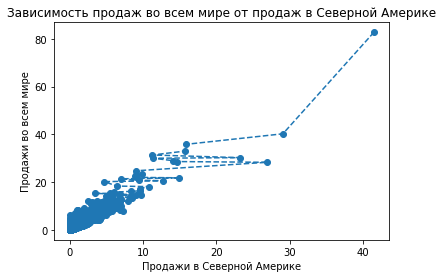

In [12]:
x = list(df['NA_Sales'])
y = list(df['Global_Sales'])

plt.plot(x, y, marker='o', linestyle='dashed')
plt.title('Зависимость продаж во всем мире от продаж в Северной Америке')
plt.xlabel('Продажи в Северной Америке')
plt.ylabel('Продажи во всем мире')

plt.show()

### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

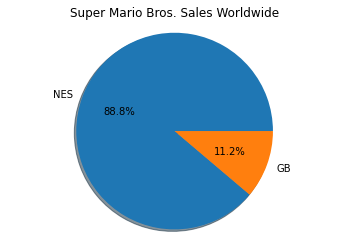

In [12]:
mariobros = df[df["Name"] == "Super Mario Bros."]

labels = mariobros["Platform"].unique()
sizes = mariobros["Global_Sales"].unique()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Super Mario Bros. Sales Worldwide")
plt.show()

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всём мире в 2013 году, и проиллюстрируйте величину их продаж на столбчатой диаграмме.

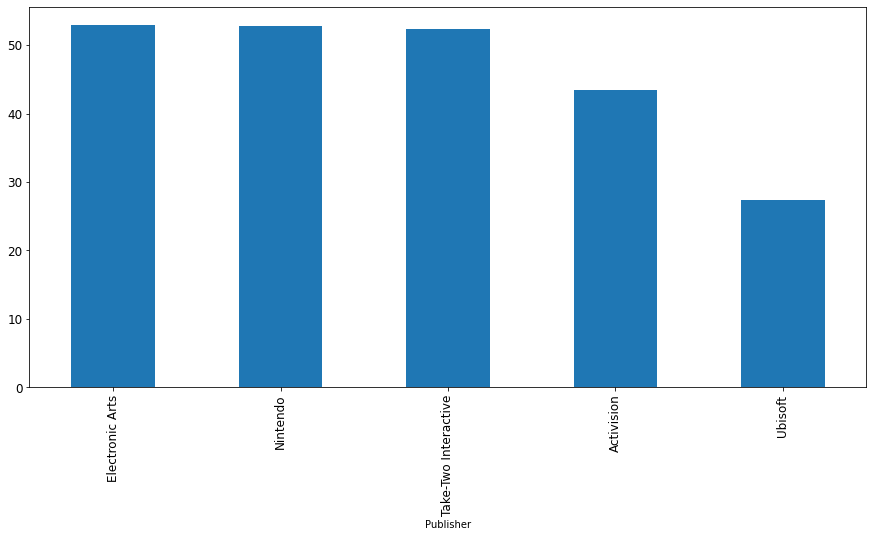

In [22]:
publishers_by_sales = (df[df['Year'] == 2013].groupby('Publisher')['Global_Sales'].sum())
top5_publishers = publishers_by_sales.sort_values(ascending=False).head(5)

top5_publishers.plot(kind='bar', figsize=(15,7), fontsize=12);


### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

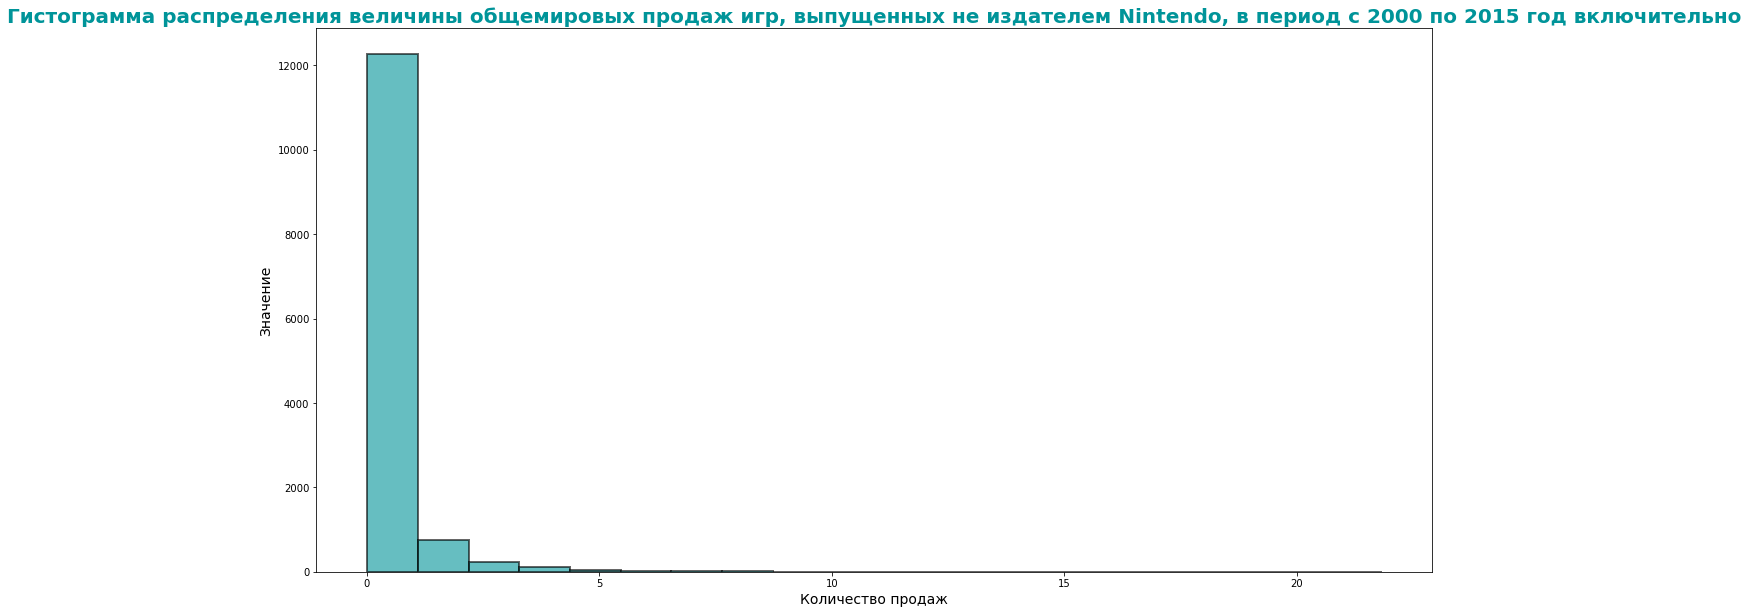

In [26]:
df = df[df['Publisher'] != 'Nintendo']
df_2000_2015 = df[(df['Year'] >= 2000) & (df['Year'] <= 2015)]

plt.figure(figsize=(20,10))

sns.distplot(df_2000_2015['Global_Sales'], bins=20, kde=False,
             hist_kws={'color':'#009499', 'edgecolor':'k', 'linewidth':2,'alpha':0.6})

plt.title('Гистограмма распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно', fontsize=20, fontweight='bold', color='#009499')
plt.xlabel('Количество продаж', fontsize=14)
plt.ylabel('Значение', fontsize=14)

plt.show()


### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам.

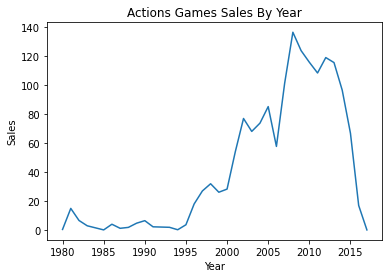

In [27]:
action_sales = df[df['Genre'] == 'Action']

action_sales_byYear = action_sales.groupby('Year').Global_Sales.sum()

plt.plot(action_sales_byYear) 
plt.title('Actions Games Sales By Year') 
plt.xlabel('Year') 
plt.ylabel('Sales') 
plt.show()


### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

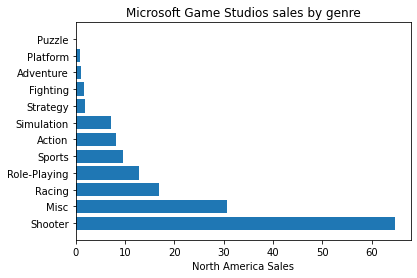

In [29]:
df_ms = df[df['Publisher'] == 'Microsoft Game Studios'].groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)

plt.barh(df_ms.index, df_ms.values)
plt.xlabel("North America Sales")
plt.title("Microsoft Game Studios sales by genre")
plt.show()

## Дополнительные (необязательные) задачи

### Задача 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:
1. Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
1. Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж.

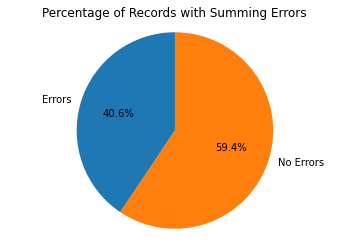

In [30]:
errors = df[(df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']) != df['Global_Sales']]
percentage = 100 * len(errors) / len(df)

labels = ["Errors", "No Errors"]
sizes = [percentage, 100 - percentage]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.title("Percentage of Records with Summing Errors")
plt.show()